In [2]:
#Libs imports
import pandas as pd
import datetime

In [3]:
race_hk1_org = pd.read_csv("datasets/races.csv")
race_horse_hk1_org = pd.read_csv("datasets/runs.csv")
race_hk2_org = pd.read_csv("datasets/race-result-race.csv")
race_horse_hk2_org = pd.read_csv("datasets/race-result-horse.csv")
#race_ca = pd.read_csv("datasets/races_ca_woodbinew.csv")

print(race_hk1_org.count())
print(race_horse_hk1_org.count())
print(race_hk2_org.count())
print(race_horse_hk2_org.count())

race_id               6349
date                  6349
venue                 6349
race_no               6349
config                6349
surface               6349
distance              6349
going                 6349
horse_ratings         6349
prize                 5887
race_class            6349
sec_time1             6349
sec_time2             6349
sec_time3             6349
sec_time4             3634
sec_time5              821
sec_time6              115
sec_time7                0
time1                 6349
time2                 6349
time3                 6349
time4                 3634
time5                  821
time6                  115
time7                    0
place_combination1    6349
place_combination2    6349
place_combination3    6324
place_combination4      23
place_dividend1       6349
place_dividend2       6349
place_dividend3       6324
place_dividend4         23
win_combination1      6349
win_dividend1         6349
win_combination2        12
win_dividend2           12
d

In [4]:
race_hk1 = race_hk1_org[[
            "race_id", "date", "venue", "race_no", "config", "surface", "distance", "going", "horse_ratings",
            "prize", "race_class", 
            "sec_time1", "sec_time2", "sec_time3", "sec_time4", "sec_time5", "sec_time6", "sec_time7",
            "time1", "time2", "time3", "time4", "time5", "time6", "time7",
            "place_combination1","place_combination2","place_combination3","place_combination4",
            "place_dividend1", "place_dividend2", "place_dividend3", "place_dividend4",
            "win_combination1", "win_dividend1", "win_combination2", "win_dividend2"
            ]]

race_hk2 = race_hk2_org[["src", "race_date", "race_course", "race_number", "race_id", "race_class", 
                    "race_distance", "track_condition", "race_name", "track", "sectional_time", "incident_report"
                        ]]
    

race_horse_hk1 = race_horse_hk1_org[[
             "race_id", "horse_no", "horse_id", "result", "won", "lengths_behind", "horse_age", 
             "horse_country", "horse_type", "horse_rating", "horse_gear", "declared_weight", "actual_weight",
             "draw", "position_sec1", "position_sec2", "position_sec3", "position_sec4", "position_sec5",
             "position_sec6", "behind_sec1", "behind_sec2", "behind_sec3", "behind_sec4", "behind_sec5", "behind_sec6",
             "time1","time2","time3","time4","time5","time6", "finish_time", "win_odds", "place_odds",
             "trainer_id", "jockey_id"
             ]]

race_horse_hk2 = race_horse_hk2_org[["finishing_position", "horse_number", "horse_name", "horse_id", "jockey", "trainer", 
                     "actual_weight", "declared_horse_weight", "draw", "length_behind_winner",
                     "running_position_1", "running_position_2", "running_position_3", "running_position_4",  
                     "finish_time", "win_odds", "running_position_5", "running_position_6", "race_id"
                      ]]


In [6]:
races_merged_hk1 = pd.merge(race_hk1, race_horse_hk1, on="race_id")
races_merged_hk2 = pd.merge(race_hk2, race_horse_hk2, on="race_id")

print(races_merged_hk1.count())
print(races_merged_hk2.count())

# Using this because not all the horses finish the race
#races_merged_hk2_nodups = races_merged_hk2.dropna()

race_id        79447
date           79447
venue          79447
race_no        79447
config         79447
               ...  
finish_time    79447
win_odds       79447
place_odds     75712
trainer_id     79447
jockey_id      79447
Length: 73, dtype: int64
src                      30189
race_date                30189
race_course              30189
race_number              30189
race_id                  30189
race_class               30189
race_distance            30189
track_condition          30189
race_name                30189
track                    30189
sectional_time           30189
incident_report          30189
finishing_position       30187
horse_number             29851
horse_name               30189
horse_id                 30189
jockey                   30189
trainer                  30189
actual_weight            30189
declared_horse_weight    30189
draw                     30189
length_behind_winner     30189
running_position_1       29574
running_position_2       29560


In [7]:
#print(races_merged_hk2_nodup[races_merged_hk2_nodup['horse_number'].isnull()])
races_merged_hk2 = races_merged_hk2.dropna(subset=['horse_number'])

In [8]:
print(len(races_merged_hk1[["race_id", "race_no", "horse_no"]].drop_duplicates()))
print(len(races_merged_hk2[["race_id", "race_number", "horse_number"]].drop_duplicates()))


races_merged_hk2_nodup = races_merged_hk2.loc[~(races_merged_hk2["finishing_position"].isin(["WX", "PU",
                                                                                          "WV-A","WV",
                                                                                          "UR","FE",
                                                                                          "TNP", "DISQ",
                                                                                          "WX-A", "DNF"                                                                                          
                                                                                          ]))]

print(races_merged_hk2_nodup.count())
print(len(races_merged_hk2_nodup[["race_id", "race_number", "horse_number"]].drop_duplicates()))

races_merged_hk2_nodup["finishing_position"] = races_merged_hk2_nodup["finishing_position"].str.replace("DH","").astype(float)
races_merged_hk1["date"] = pd.to_datetime(races_merged_hk1["date"]) + pd.to_timedelta('4123 days')
races_merged_hk2_nodup["horse_number"] = races_merged_hk2_nodup["horse_number"].astype(int)
races_merged_hk2_nodup["race_date"] = pd.to_datetime(races_merged_hk2_nodup["race_date"]) 

79447
29851
src                      29519
race_date                29519
race_course              29519
race_number              29519
race_id                  29519
race_class               29519
race_distance            29519
track_condition          29519
race_name                29519
track                    29519
sectional_time           29519
incident_report          29519
finishing_position       29519
horse_number             29519
horse_name               29519
horse_id                 29519
jockey                   29519
trainer                  29519
actual_weight            29519
declared_horse_weight    29519
draw                     29519
length_behind_winner     29519
running_position_1       29519
running_position_2       29519
running_position_3       29519
running_position_4       16612
finish_time              29519
win_odds                 29519
running_position_5        3763
running_position_6         549
dtype: int64
29519


/home/mario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/home/mario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [9]:
print(races_merged_hk1.count())
print(races_merged_hk2_nodup.count())
print(races_merged_hk1[["race_no", "horse_no", "distance", "actual_weight", "date"]].dtypes)
print(races_merged_hk2_nodup[["race_number", "horse_number", "race_distance", "race_date"]].dtypes)

race_id        79447
date           79447
venue          79447
race_no        79447
config         79447
               ...  
finish_time    79447
win_odds       79447
place_odds     75712
trainer_id     79447
jockey_id      79447
Length: 73, dtype: int64
src                      29519
race_date                29519
race_course              29519
race_number              29519
race_id                  29519
race_class               29519
race_distance            29519
track_condition          29519
race_name                29519
track                    29519
sectional_time           29519
incident_report          29519
finishing_position       29519
horse_number             29519
horse_name               29519
horse_id                 29519
jockey                   29519
trainer                  29519
actual_weight            29519
declared_horse_weight    29519
draw                     29519
length_behind_winner     29519
running_position_1       29519
running_position_2       29519


In [10]:
final_df = pd.merge(races_merged_hk1, races_merged_hk2_nodup, how="inner", left_on = ["race_no", "horse_no", "date"],
                   right_on = ["race_number", "horse_number", "race_date"])

final_df.count()

final_df.to_csv("final.csv")

In [11]:
print(final_df.count())
print(len(final_df[["race_id_x", "race_no", "horse_no"]].drop_duplicates()))


race_id_x             22544
date                  22544
venue                 22544
race_no               22544
config                22544
                      ...  
running_position_4    12758
finish_time_y         22544
win_odds_y            22544
running_position_5     2878
running_position_6      378
Length: 103, dtype: int64
22544


In [62]:
dist_df = final_df[["race_id_x", "date", "venue", "race_course", "race_no", "config", 
                    "surface", "distance", "going","prize","race_class_x",
                    "track", "race_name", "track_condition", "race_distance", "race_class_y"
                   ]].drop_duplicates()
# number of races to analyze
dist_df.count()
len(dist_df["race_id_x"].drop_duplicates())


1801

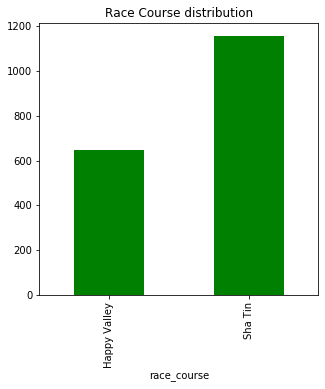

In [50]:
def plotHistogramSize(df, ylabel, xlabel, title, xSize, ySize, color):
    graph = df.plot(kind="bar", figsize=(xSize,ySize), color=color)
    graph.set_ylabel = ylabel
    graph.set_xlabel = xlabel
    graph.set_title(title)

       
group_track = dist_df.groupby("race_course").size()
plotHistogramSize (group_track, "Number of races", "Race Course", "Race Course distribution", 5,5,"g")

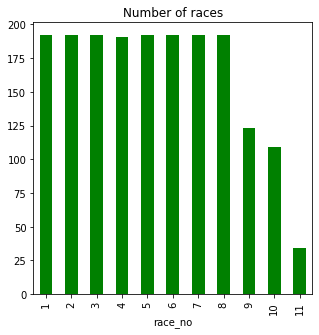

In [51]:
group_race = dist_df.groupby("race_no").size()
plotHistogramSize (group_race, "Number of races", "race_no", "Number of races", 5,5,"g")



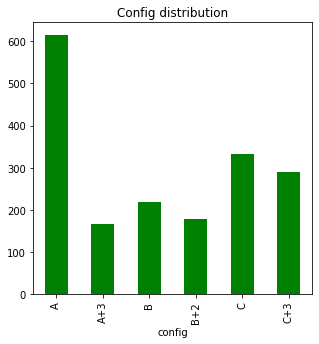

In [52]:
group_config = dist_df.groupby("config").size()
plotHistogramSize (group_config, "Number of races", "Config", "Config distribution", 5,5,"g")

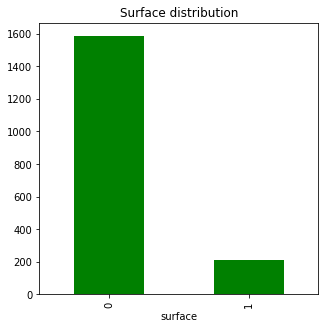

In [53]:
group_surface= dist_df.groupby("surface").size()
plotHistogramSize (group_surface, "Number of races", "surface", "Surface distribution", 5,5,"g")

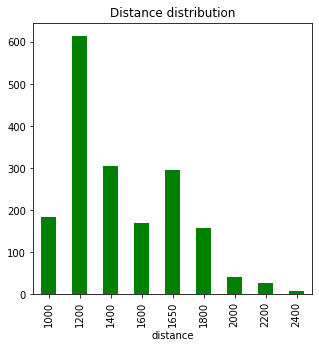

In [54]:
group_distance = dist_df.groupby("distance").size()
plotHistogramSize (group_distance, "Number of races", "distance", "Distance distribution", 5,5,"g")

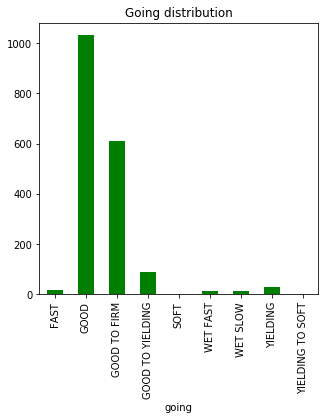

In [55]:
group_going = dist_df.groupby("going").size()
plotHistogramSize (group_going, "Number of races", "going", "Going distribution", 5,5,"g")

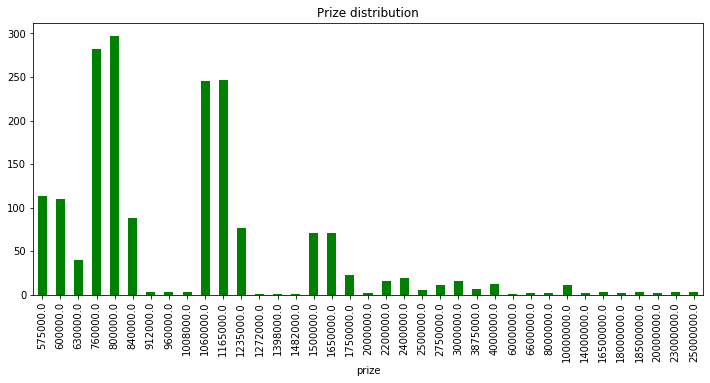

In [56]:
group_prize = dist_df.groupby("prize").size()
plotHistogramSize (group_prize, "Number of races", "prize", "Prize distribution", 12,5,"g")

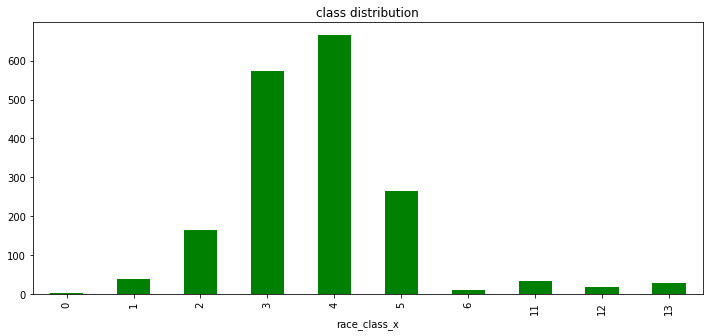

In [58]:
group_class = dist_df.groupby("race_class_x").size()
plotHistogramSize (group_class, "Number of races", "class", "class distribution", 12,5,"g")

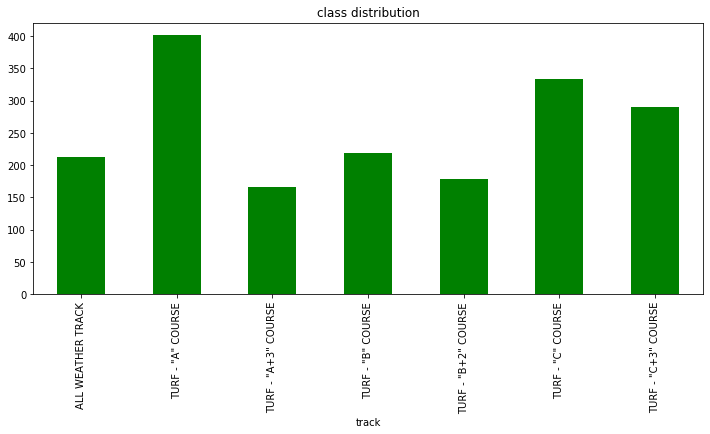

In [59]:
group_track = dist_df.groupby("track").size()
plotHistogramSize (group_track, "Number of races", "track", "class distribution", 12,5,"g")

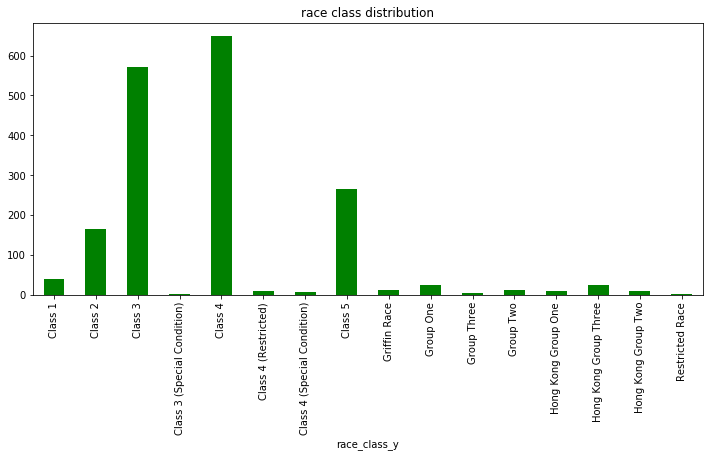

In [64]:
group_class = dist_df.groupby("race_class_y").size()
plotHistogramSize (group_class, "Number of races", "race class", "race class distribution", 12,5,"g")

In [65]:
final_df["speed_mseg"] = final_df["distance"]  / final_df["finish_time_x"]  

,actual_weight_x,speed_mseg
0,103,16.653366
1,104,16.262585
2,105,16.871956
3,106,16.320667
4,107,16.631189
5,108,16.509848
6,109,16.682102
7,110,16.760581
8,111,16.522833
9,112,16.547771


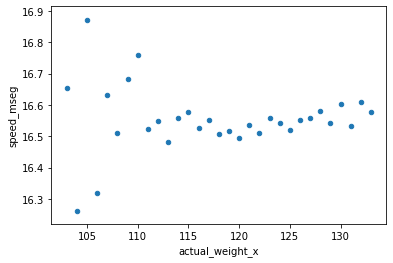

In [106]:
# Generate a scatter 
filtered_df = final_df.loc[final_df["race_class_x"] == 5]

df = filtered_df.groupby(["actual_weight_x"])["speed_mseg"].mean()
df = df.reset_index()
df.plot(kind="scatter", x="actual_weight_x", y="speed_mseg")

df

,declared_weight,speed_mseg
0,902.0,16.556291
1,905.0,16.248154
2,914.0,16.453382
3,915.0,16.168149
4,916.0,16.375234
...,...,...
385,1313.0,17.035775
386,1315.0,17.424132
387,1318.0,16.692500
388,1326.0,15.989340


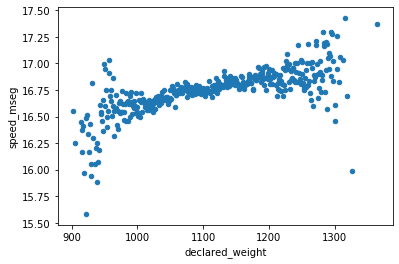

In [87]:
# Generate a scatter 
df = final_df.groupby(["declared_weight"])["speed_mseg"].mean()
df = df.reset_index()
df.plot(kind="scatter", x="declared_weight", y="speed_mseg")

df

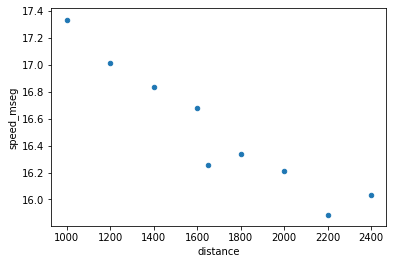

In [98]:
df = final_df.groupby(["distance"])["speed_mseg"].mean()
df = df.reset_index()

df.plot(kind="scatter", x="distance", y="speed_mseg")

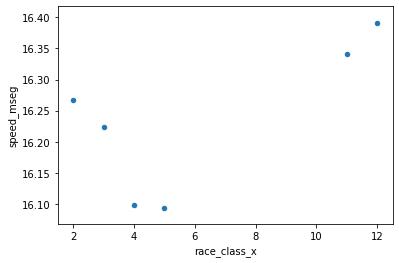

In [111]:
filtered_df = final_df.loc[final_df["distance"] == 2000]
df = filtered_df.groupby(["race_class_x"])["speed_mseg"].mean()
df = df.reset_index()

df.plot(kind="scatter", x="race_class_x", y="speed_mseg")

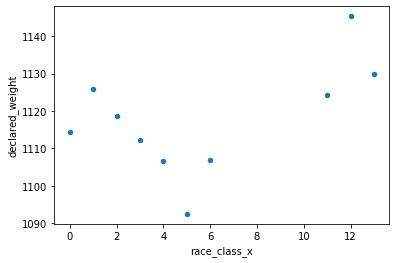

In [112]:
df = final_df.groupby(["race_class_x"])["declared_weight"].mean()
df = df.reset_index()

df.plot(kind="scatter", x="race_class_x", y="declared_weight")

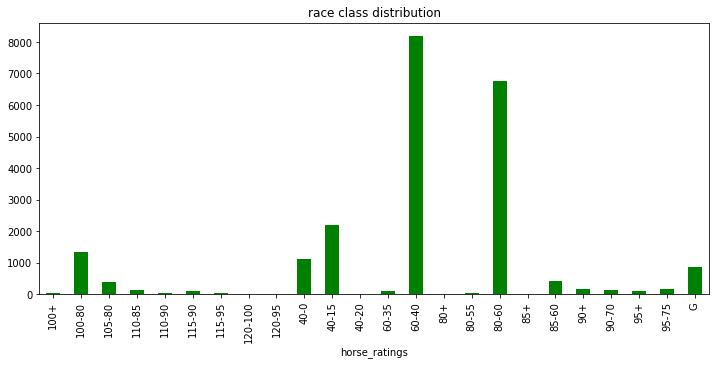

In [115]:
group_class = final_df.groupby("horse_ratings")["horse_id_y"].count()
plotHistogramSize (group_class, "Number of races", "race class", "race class distribution", 12,5,"g")

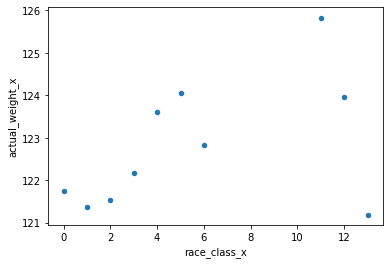

In [116]:
df = final_df.groupby(["race_class_x"])["actual_weight_x"].mean()
df = df.reset_index()

df.plot(kind="scatter", x="race_class_x", y="actual_weight_x")